In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import cv2
import urllib3

/usr/bin/python3
Installing: numpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scipy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: matplotlib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: pandas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-contrib-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Загрузка изображений

In [ ]:
url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBQUFBgVFBUYGBgZGBoZGhsaGRgbGxsaGBsZHRsYGxscIS0kGx0qHxgaJjcmKi4xNDQ0GiM6PzozPi0zNDEBCwsLEA8QHxISHzMqJCo1MzM1MzMxMzM1NTUzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzMzM//AABEIAOEA4QMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABQYBAwQHAgj/xABIEAACAQIDBAcEBgYHCAMAAAABAgADEQQSIQUGMUETIlFhcYGRMkJyoQdSYoKxwRQjQ5Ki0RYkM1NzsvA1Y4OEs8LS4RU0lP/EABoBAQADAQEBAAAAAAAAAAAAAAACAwQBBQb/xAAsEQADAAIBBAIBAgUFAAAAAAAAAQIDESEEEjFBE1FxIjIFFGGBkTNSscHw/9oADAMBAAIRAxEAPwD2WIiAIiIAiIgCIiAIiIAiIgCIiAIi8+GcDiQPHSAfcThqbWw6mzV6SnvdB+Jn1R2lQc5Uq02J4BXQk+QM5sHZEROgREQBERAEREAREQBERAEREAREQBERAERI3a+2aGFXPXqKgPsg6sxHJVHWY9wEAkonnG0fpEqNcYWgAOT1yfUU0N7eLCV/Fb0bQqccUyd1KnTUerKzfOVu0TUM9nvNVWqqAszBVHEsQAPEnhPETtrFAgtisQwBuR0rC45jq2tO7bOHw7halXFVbMAUL1s2hGhVagIv4CceVI6sTZedpb+4KlcI7Vm7KS5h++bJ/FIp98sVVUNRp0qSng1QtVfzRMqg/eM89xVSilhTxAftLqLeGZMuvkZ0bM20lLquVKnmrBgD29o8xKqy0/BoWBJcplpr4zF1CekxdYg+7Ty0lHcCih/VjOYbLot/aIX76jvUPrUYz7p1VcAqwI7jNkqd0/LClL0baODooOrSpr4Ig/ASF3lx/RKKiKAaTK4YC1nBui3HbY+U7sZixTQsx4D1lT3pxLZUw59s/rq3c7gBEPwoBp2mcnbaDP0HScMoYcCAR4HUTZIbdDEGpgcK54th6RPjkF5Mz0DGxERAEREAREQBERAEREAREre0d7KKM1OkGrVEYqyqLKrC9w7nQWI1tc9042l5OpN+CyTjx+0qNBc1aqlNe12VR85R8ZtXF1vbq9Gp9yj1T4GoesfFcsjFwdNWLhAXPF26znxdrsfWUvPPosnE/ZbsRvxhh/ZLVrH7CEL+/UyqfImcFTfLEsf1eEpqvbUrnN+4iEfxSDLSN21tMUaentv1UFr+LW7BK/mp+CxYUSX9M9o1qppUv0dLHrN0bvlF+NzU1J5C3pKrjKrPVepUdnfOyl3N2IViAByUaeyLAXmnZeIYVFVanR668Gc3IuW90E+c+dtUzQqZc4fOC5NgpBLG9wDb8Oc4sm67Wy2uncz3aNhqT5arOPDmpU9gAAcSxNvIcTOyns5f2lRrdxCD+fznaqZ8kJhvk5q2KA7zOHD1jfMSc44E34KdFHcOySG1lwYVRTy5gddS2neTeRXSqHADDLe9uy62J9QIV9y8FmNdtI9D3UpYLFdItRXzjKwYu6hQ4tlIVgNGVtewiWQ7lYNtGRx2Faj28bMSJ55uhtanQrlqmYo1N0ayO2uZWTgO5vWXjD724ZdBVOXsqI6W8C6gTVhmKlb1v+pl6q8qtuW9f0OLbX0fpSpvVw9R7oMzKQtyo9rKyBesBqLg3tbneV3A4ioQVz3KMUJBuGtqGFvrKQfOekYTeKhUGUVUNwQCGU8eRseE8j2VWWnUqU7GxPUAHEozJYd5Cj0lWfElyifT56yJqvRI4iuiMHqXYIM5H1ivsIe5msD3AypvVapUNRzdnYsx7yZ37YxeZsgNwDdzyZ+wfZXgPC84MOLG/Zr6SqJ9lls/QO4P+zcL/grLDIfdLDGlgsKh4rh6YPjkW/zkxNSMj8iIidOCIiAIiIAiIgCIiAJ45vY7YTHOuihyatJvdcVGLOj9+fOQeWYcjPYpQ/pW2L02FFdRdqBJPaab2D+hCv8AcMryT3InjrTIPCbQWoNLqw9pToynvE+3eUnZ20gbUqz5HXSnW1sBySrbUp2NxXvGkmkx1QEqxBI48D5gjQg9omNy0a1ydO19qrRXkXN8q8tOLMeSiY3c3Qr4xunxLNTptrci1SoOQQfs6ffxPLtnHsjJU2jTFZQ4ZgADwvkY07jmM44HS5nq77Tto6/kfSasGHa2U5rqOJ8/ZSfpA2VToYfDnD01ppTcqcv+8XRmJ6zMWUanXWef4+szuHIGoAP3bsPA2LS/b7bw4V6b4dL1HawIX2abAghmbgCCAbDWUZMIW/tDfnlGi+nPznM0JUmiXT5n8Tmvs5KeKqEkUQbHnb8L8Jvp7JqVDepUPgNT89PlJBEC8J8PizmCU1LueCqLn5cpXwh3NmzD7GorqVzfETb04TacVQp6KFHcqj8hOnD7tVagBxFUoPqJYkeLHS/kfGSmH3ewifsgx7XJf5HT5TPfUwve/wAFix0ysVt4kHAepH5TmbeM8lEv6YWkvs00Hgij8pEbU2rg6bFGpo7jiqoht3EnQHu4yMdSqeplh4teWU+rtYP7VJG7yq39eM0NiEN7KyE9hNuN+BvbXXSXHBHBYnRaaBhrkZFVrdotxGvKbKu7mGP7ID4WYfgZY+plPVJo4sT8plEJ7wfkfnOvDYY1P1a+05CDuZyFHzabts4KnSrdGgewW5ub8Re47h+Rln+jzZfSYynp1ad6rdnV9nzzsp+6Zqhqkmiq9z5PaqSBQFHAAAeA0E2REvM4iIgCIiAIiIAiIgCIiAJrq0wylWAIIIIPAgixBmyIB+c969hthMQ9E3yqc1NvrU29nzGqnvU9s4dn7Q6PqvfLyYasnl7y93pPafpF3cOLw+emt61G7IBxdD7dPxIFx3qJ4dUpyi4NGOyVx+IK1EdCA1gyODdSUYMjA+Ja45Sa3g3wqYtRTpXRCAXf3yTxRT7qjgTxPdzpqJmNuQ4+ckUW07DcrSZLI1WjfhqYUWAm5qgA1M5alYKLmcZDVNTovZ2+Mi+OWRSbJbB4WribdGClIsVNQjQkalU+s1pbdm7Pp0Fy011PtMdWbvJ/LhKthduYg/o1Bn/VUnAVQANCCupHGwY2lwR78Bfwnn9XT2knwacMrRsLQDN6YRzyt4zoTZ3aZgdyi8hNsYk0qL1BxC6fEdB8yJw767WwdehQpYVNU6xbLYqMtihPFiSbnw75ObxbHNTC1VS5YLmAHElCGsO85ZQaWEZgGpgsCOWs39Jknsf5KMk7ojqLNTdXU2ZTcHv/ANfjPUdnsKtNKgGjqreFxqPIyjHZVQI1SpTZUFgSdLXufyPpPQN0sCaeDoh9DkzWPEB2LAeQYSHWWuxV7EbTKLvvT6PFo3+7Rj4K7g/LSXT6LGp03r0uFQ5WUm3WpLcZV+F2N/jWVv6TKf8AWKPfSI9H/wDc+Nj16iNRr0gS6BXA+sMtnQ/ELjxt2TR0+XUS2QuO5NHuMTnweKSrTSohurqGU9oYXE6J6ZhEREAREQBERAEREAREQBERAMTxv6UN30wzdPSyhazEZOBFQ3LMo5oeJHJvi09lnl30u7NLvh6vSDg6LTIPxNUBHcFBv9mRvxsnj5pI8yQBROjDipUOWmhY8zwA8TwEY3Z/RopLXJYCwFhax8+XbO7d45GPGxziw5svRldOA0Z9ZlrJ+ncmqcbdKWfVXYB6MnNnqaEfV0OqjtJHM/Kc9CmhNi+Q+8rA5vTtlv2e1FmC1S6XIAJAykngCwJt52lvwuHp09FQDvtc+p1mDJ1VR+5GisPbxopm727XSVBUKutFCSmcZXcnQadg1N+21pdqeCVRZQBOwGasQrlCEYK/IlcwB71uLjlxHGedkzVkrng4uDRVQIpZuA1OhPyAuZsSmCAeRF9QQde46ia0pVm9uoqj/dqQT95ybDwF++ZXCOD1az2+q2Rx5Erm+cg5X3yNs6BTkFX3XQOalGo1EsbsoAZCTxIU+yfAgd0msNQyCxd3JJJZiCbnssAANOAAE3GcnJUP9LBA/wDwKswNeo9ULqEIC07jhdR7XgTaSGLxaUlL1GCqOJPoB3k8gJ1MJSNu4rpK7D3KRyKOWewzv465e6x7Zoxy8r1T4Rdhxd9dqIzfrGJXWnURXBQlSWWwKPbvuOsBxA4yR3Gph8hPuq49GIkJtuqOhYHnZR4kiWP6Pl6hPe/zYzbmSjBpHM+NY70vouu7tTo3fDnhrVp/A566j4XN/CossEqe0H6MpXH7Jszd9NtKg/d63iglrB7Js/h+b5MS35XB5eadV+T6iIm8qEREARF4gCIiAIiIAiIgGJ5Pv1ijWxrKDdKKLTHxv13PoaY+7PVarhVLHQAEnwGpnnb7O6TDCsR+sctWPaQ7F8p8FIHlMXWZlEpP2aOmX6t/RRt4qNqdPvcf5TObZalXueF3X7xWkwHorehkzvKl6dH/ABR/lefezcAtTpqbXGtN1I4q2VgGH7p8dRM0XqOTfD7cioBgRY89DLbu3iC9EZjdkYoT2gWKk9+RlvKZVpvTUNUWylmRag9h2VirAH3Wup6p8ry5bqYU06F3BBdi9jxAsqrfxCA+cz9UtRz/AGNvUZYuU5ZPJNk09Io5icWK29haej1kU9hYX9OM8yYqnwjAyTiQn9JqB9gVH+Gm9vVgB858NvIOWHrnypD8Xlnw39HVFP0T0xK629AHHD1x91D/AJXM+RvlhwevnT40ZR68IfT5Po72UvRYyJ5vtOmadesp49I7eTsXB9G+UuSbfosuZXBXjccPWUbeveSjiWyJTJVQb1ABma2oRTcWQni2ul7DW419Jivu01wdx5XjrZDbSLPkf3MzKn2mWwZ/hBbKPOXvcVLI3xMPRjKjtTaNKo1IUtVRCMoBGXMygaEdiy57lf2d+1nP8by/q9/FrRCrd06ZaGQMCCLgggjtB4iUlto41FNIYqooosaVlSjfKmisWZCSSmVr35y7PUVRdmCjtJA/GUvaGLo1MW606ivnphmym4Docp6w0JKleH1Jm6WrhPRW1NUtlhoYF3RWbFYprqCf1uXiPsATJ2Kh41cSf+ar/k86NlvemvcLek7JTXU5t/uf+TvxyvRGLsKn/eYj/wDTiP8Azm1NjqOFXEj/AJiqfxYzvWfYkpzZP9z/AMkXK+jiTZ9QezisSv30f/qI032xajqYhW/xKSn50yk3z7UzRHUX9srcr6NI2jik9uilQdtN8p/dcW/inThduUncI2am50CVFKEnsUnqv90mZBnAF6bFInuUB0jd9RwVpr5LnbzWbsPUXVKfJVUTrZYomLRPR2yk+oiJ04QW+NbLg6ii96mWgtuN67rTuPDPfymoUwAFA0AtbuAtaRH0mbSaimGFO2Y18+ouLUkYjT4mT0lGxG9ONf8AbZR2KiD55SfnPN63p6zNa9GjDSlHRvXTyUh9isvp1l/ORj7YajUfIoLOiWJuQuQvc2HtHUaaSvY6u9Ry9Rmc3uc7Mfny8pbNzdmnE4qjSZUWnb9Ia2rOKRSyFjqQWdbjsvJYsPbqXyXVk4bR6vsPZYXB06NZVe9MGorAFWd+tUuDobuzSg77OuAqLTwpqBnXOUZi1JUJK9W/XBup6oNh5z1ieR/SVtZK2IWkig9BcO/Mu4F6YP1QMpPfpyM1ZVPbyinp06tIgzUeqL1KruD7oYovhlX8yZiliqFHRci9ygX/AIdZC1Vvp8v/AFPnJbS1vlMix7Xk9v5FK0pX5LF/SNBwR28AB/mIht5jypHzZR+F5ArMyHxzvwc+RsmH3kY/s/4//U0vt8H2qbDwKn8xI1KZc5V1P+tZJUcGlPrNqw5nl4CdcwvRPG7rx4ODaVSkykimQxsfZK315r7/AJyb2nuoyLQdQf1zBVWmc2rKWU2I00F9NLAyKxNcFhnYAcgf9ay67G2i5wdCplJaippUQ3v1mQ01Yc8qoWJ7s3ZO93bryZOq4ra0ea4dyubhp1T5ZtPUjymMMBcEj2tT56xi6IR6iAg5GZcw4Eg2v+8J9U3B00uP9ek0rT5MNb0dy0Ev7K+gnXhKvR1ab8g4U+D9T0uwPlOWk95sxAujW42JHiNR8xOXKa0Ql6ez1LYtXip8RJeVPB4q2SoOBAbyIB/OWmk4YAjUGfN541RtZ9KZsBnxAkJvRBo2gzKma1M+ry6aINGwuALnQDUnuEbtp+p6UizVmNU34gP7APggUeUjdsXamKQ41nWkLcbOeuR4IHPlLMigCwFgNAO4T2Ognadf2M2Z64NkRE9LRRsREToPK/pSq5sXRT6lBmPjUew/6fzlIqmwvLX9If8AtB/8GkB4XqH8TKdj6mVTfwlNeS6fCOTC4V61RadMZnqMEUdpb8hqT3Aywbpbb/RaqVmUlaYZHUGz5HsLqD7ViFNudpdPoy3TNFf0uupFR1tSQjVEbixHJ208B4mVPaGxadOtQWocqGg9IkkgLVw5emXJ+M037LMeU72Nrf0d71to9spVVqUw6MCrqGVhrcMLqw8iDPAcRSKO6MczB6nXP7SzsC4+I6nsvPVtzdoBMA5c2XD57k8kyCqo+6rhfuyjYTDpWooKgvmVW7CCRe4PI6yrqqUpbLujpzTaK5SfKwa2gMnxhKdVdRcciOI85xYvZdajdlHSpzsLsB9pBx8V9J9bLxVMm6EC/EX09Jjp7W5PYxXNJrf9maMVsGomtPrr2aBx+TeVvCc+E2ZWqNYU2Qc2dWUDyNix7h8pc6IvrN7SHz0uCLhb4IfD7Np0Usup95jxP8h3CRmKBLqqjM7GyIOZ5s3YBzPKS20axLCnTXO7eyoNtPrMfdQds79lbLWiCzHPUb23tbwRB7qDs8zIPJ2ruryLyqZ7Z8/8FTfZdRLmolRmLdbIma/gwJ6ngAde2Sa1cU4YYem5ajSLKrCxRGOUtTp+1Ucd4v43sbLUw1R/YQn/AF3yOwFSphtpYVqilVqdJRa/AhwCv8YT1luDKslKWjzsraTeyg4XZ1ZxmAuOWuhIOt79/wA4qYVwQHpsv2gLgd+YaW8Z7htfdGlWY1KbNQqNqzIAVc9rodGPeLHTjKLjtjYlatSnmouUKgtZ0BzKG9nr20btmrJ3Ry9aJ4MmGl2vaf8AkpDFqerC6/WHDz7J206gZdDcESabdmsScz00B4gBnHzyzdht1qZq4eirshqM6F1tqVpO4YodOKcrHvnIzTbU75Ks2OVzPg7tlVL0KX+Gn+USV2PtTo36Nz1WPVPYezwkz/QegKaIlSrTZFVc6vfMVAGYo4ZNe4CQW0tz8agJQ08QvYL0nt4EsjHzWU5eh7tnJ6iWtMtQMzKXs3eRsO4oYtXpngvSKVbyJ0cd6ky40qquAykEHgRwni5cF4q00WbT8H2J9gzWDPoTksNGjCr0mMUcqFMufiqkonmFSp+9LNIDdZcy1Kx/a1WK/AlqaW7jkLffk/Pp+lx9mNI8/JW6ERE0EBERAPLvpJwL/pdN0pu/SUggyozHPTZjbqjscehm3dLcJukXEY1R1SGp0dDY8mq8iwPBRcC1yeQv+O2jSo/2lRVuCQCdTbjZeJ8pH4XebDVMvWZAwBU1EdFYHhZmGXyvK25T5ZPda4JwCVjbW6wxFTNnQIWzlXp9IVqZcpemSwCkqACGVhdQbXlmVgeEitv7U/R6YyLmq1GFOkl7ZnNzr2KoBZj2KZNtJbZBFW33alhsGMFR0aqbEXu2QHPUdydTnIyk8y86Nh7Opfo1E5FJNKmSSLnVFnyu79M3eoS9Z9XqG92buHBUHALyE693x/VaHdSQfugD8p4PWdSsv7fTN2KO1HzW2Uh9nq/hK7tXdynUN3SzfXTqt5kcfO8uhE11KYIsRMU5bh7TLkzzp9mYjDoz06wdUUtkdbGwFzZl7u4RszF4nEkqiImW2ZyxIXNe1l4sdOGkudfBDVeTAjyOkgdwsJ/V3Y6lqrA/8MKn4q3rNazpw7aW1os+Wlxs79nbKWmCEuWbV3PtOe1j+XASaw2CVdTqZvp0wvCbgJjdu3tlbZ8qsqG/tJ3bDrT9tS7p3MhQqdOxrS43kQ6h8YOYp0PnUcflTluG+yu5eiGtkFtzfeutakaJyFaZ6ahUUEB8w0JGoBXVWBtY3seE1UNt9O71RSbPVysKaMrkBEVGYsSAqZlPWbLwnfvjspK3R5NMQWyoQOKXu+f7Cgk35G1uNjEYmgtOk2FoEhW0q1Pfqcm15C2gHIHSejXUrLKVe/RGMan9vk3LXqO6MXFBatMNS6TKyMQbstTKcyEh6dmFwLG44TrwlKsuOwi1aFRHWuxJsXQr0FYFlqDQi7DjY68JEVaRqOACRmRcOgvzrVEV7DkAqr6T2OaOmxw0q1yirNdTx9mRERN5lOfF4SnVQpURXU8VdQynxB0lbbc8UiWwdVsOfqEdJRP/AA2IK/dYS2TEhcTS1S2SmmvBTKuMxFD/AO1h2yj9rQvVS3ay2Dp+6QO2MbtNWwzVMO6uz2SmwN16SowRAbfaZdJc5EVN3sK1Va/RKKgYPmW6ZmX2S4UgORyzA2sOyYK/huPuVTx/QtWd60zvwOFWlTSmvsoqqPBQB+U6YiekigREToERE4DzbfjHV6GNVxcUzQA6oBYqHbORzJQlDYe6x4yL2dtKpSJVGD0G1CNYhb6lV01Q3uBy8OHoO9GxRi6OUELUQ56T2vlcAixHNWBKsOwnnaefYSibsjqUdGyuh4q35gggg8wQZ5vWRr9WvJt6ek12lj2bj2XrYUgfWw7nqH4G/Znw6vdzmcLtBcXjHqFWQ0aa01puMro79aqxW9jwpqGFwcpsSDIpKViCuhHMTpxeEXFBTmNLEIOpUXQ/C31kPNfS0w/zFdjhvh+/osrDPd3Isl5ybFGWmU+o9RfAdIxUfulZXMDt/EUy1KvTBdLA628GBtZlPIj8QZJ7DxZarVVtM4WoPEWRgPAKnrMvx1O9kmuCevPkzN5gylsGCJDbqIFw1h/fYj5Ymt/KTUgd0Kmai/dicSPWs7f90nP+lX5X/YfknhM3mJkytMNC8hMNikX9JxLtZQ5W/wBmiAlh9/P6yQ2jixSpPUPBEZvGw0HmbDzlOwmfELQwrLZAQ1U/XK3dy3czaW+1NGKO6W/X/tnCXo1nNM13GWpXFkX+7pcVXxIOY97W5CchwwtJHGPnqHsXQTVWdUVnc2VQWJ7ABcmSVP17LEtI07uYDpMbT06tBTVb43BSmPQ1G+6J6QJUdy2CU1dxZ8SBXYn3VcWpU/JAvmT2yzVMUi2uw118u3Tl3z38MqISb/J52WnVbOmJ8hwec+poKhERAEREAREQBERAMQTBkdWJJIbt4cpTly9i3olM7Z1VMUg538NZVN6MD0xFWioWsgtdjYVEFz0b28Tlb3STyJBmnmhxMlZ3S0/Bpx40nsqGDxS1AbAqynK6NoyMOKsOX4EajSdAPMTq2xscVG6Sm3R1gLBwLhh9R199fmL6ESFbaBpnLikNI/X1ak3ergdXwcKZlrpt8yae/wCycrUVrIGIGdAbHnbiR4G0ixU6OpSqclcI3wVbISe4MUb7s5MXvJQpoejqo7sLIqupuxGhJ4Ko4knlNBx1Do+jeqrXTI2U5mN1sSAtzeQjpb9+Du1rR6BeLyM2TiTWw9NybMyi+hFyujGx1FyL+c6+i7Gnm1Pa2n6OI6Lyq7iVDkrKedTpB8NRR/3I3rLDi6wRDdgDlIFyBc2PCVfc/F3YllVB0FPXODfU5eQtxbtmjFjdYbf4ItrZcSZgETRVFyBmt3ds+RlQglwLnKAbansHadDMvaSIrel84p0B7753+ClY283KeV597FoBQ78+AkPjNsUzVqOy1NGNMEI7ACmxU+zf3859OyKG81CmwDVAEbQ3DKUYcCwYA5SNL8rDt09J9NfxJJBNEw6akytb0VWqlcHTPWqEByOQa+VfQM57k+1JHG7fp5T+j/1iodFVLMATzdvZVfEi8+t3NjNTZq1Yh6z3ueIXNxAPMmwuexVA0Eu6fp3P6qOVW+EWekBlC2BAVVFwL5V4LcWNp1O2YgkWAsLDhYch2TnpibVEvdv2VuJNtA2dSRzOo7xYcTwGnpJek+YX/GRSzaotw0ncefs4KLx7JSc36ULmwJsSOXKZw9Qm4Os2PRU8QJrdVcqoevyU6SemZpVAwuP9WmyfKgDQT6l071yRERE6BERAE11KQbiJsicaT4YOF8F9U+s5nwzD3b+Gsl4lFdNL8cFk5aRXalI8wR4gzlqUZays1PhkPFR6SH8u14Zauo+0Uqpg0+ov7omk4UDgAPAWlyfZdI8iPBmH5znbYVM+8w8x+Ylix0iXzyyinZuRg1Oo6OM1mDF7Br5lAqXCjW9gONppXBOoULWqgI+dAWBs5NySSLvck6MSNfS+Nu9TPvv/AA/+M+G3aQ++/wDD/KPhl+Ujnyz6KDiMEtQk1b1WPE1LN6KRlUdygCfFXCU2tnpo1tBdQbDsFxpL426tM/tH9F/lPk7o0/7x/Rf5S6UpWtEXlkowotmVukqXS4pnNc0wdSBcdYGw0a4sAJ8ps1SoVmdlzZyrNdWfXrleAPWPC0vI3Pp/3lT+H+U2LunTHvv/AA/ynPjj0kPlRTcPhQgsuguTqSSSxuSSdSbkzqSh26y2ruvSHvv6r/Kbk3eoj6x+9/KGn6Cyoq9CmBwEkKKyfTY1Ae5fxZj+c6EwVNeCL6CVVjdE/wCYS9EMk3pTY8FJ8jJhaYHAAT6tK/5b7ZXWdvwiOTDP2W8T/Kb1wvafSdcSc9NC88lbyNnwiAcJ9xEvSSWkQERE6BERAEREARMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAMRMxAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAP/2Q=="
urllib.request.urlretrieve(url, "image.jpg")
!ls

image.jpg  sample_data


In [ ]:
img = np.array(Image.open('image.jpg'))

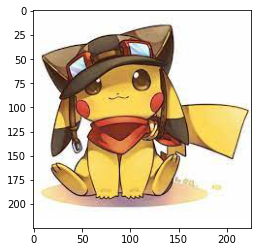

In [ ]:
plt.imshow(img)
plt.show()

# Задание 1 Изменение размера изображения

Метод ближайшего соседа

In [ ]:
def resize_nn(img, size_factor):

  if size_factor <= 1:
    print('Не коректно введен size_factor')
    return np.copy(img)

  new_height = img.shape[0] * size_factor
  new_width = img.shape[1] * size_factor
  new_img = np.zeros((new_height, new_width, img.shape[2]), dtype = np.uint8)

  for i in range(new_height - 1):
    for j in range(new_width - 1):
      x = round((img.shape[0] / new_height) * i)
      y = round((img.shape[1] / new_width) * j)
      new_img[i, j] = img[x, y]

  return new_img

In [ ]:
resize_img_nn_error = resize_nn(img, 1)

Не коректно введен size_factor


In [ ]:
resize_img_nn = resize_nn(img, 2)

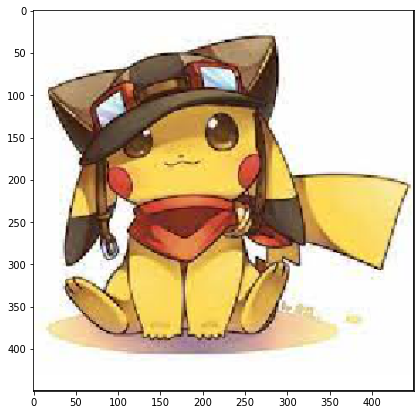

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(resize_img_nn)
plt.show()

Метод биленейной интерполяции




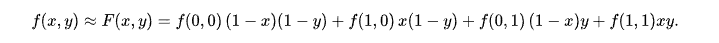

In [ ]:
def resize_bilinear(img, size_factor):

  if size_factor <= 1:
    print('Не коректно введен size_factor')
    return np.copy(img)

  new_height = img.shape[0] * size_factor
  new_width = img.shape[1] * size_factor
  height, width, channels = img.shape
  new_img = np.zeros((new_height, new_width, img.shape[2]), dtype = np.uint8)
  intermediate_value = [0, 0, 0]

  for i in range(new_height - 1):
    for j in range(new_width - 1):
      x = i / size_factor
      y = j / size_factor
      p = (i + 0.0) / size_factor - x
      q = (j + 0.0) / size_factor - y
      x = int(x) - 1
      y = int(y) - 1
      for k in range(channels):
        if x + 1 < new_height and y + 1 < new_width:
          intermediate_value[k] = int(img[x, y][k]*(1 - p)*(1 - q)+img[x, y + 1][k]*q*(1- p)+img[x + 1, y][k]*(1 - q)*p+img[x + 1, y + 1][k]*p*q)
      new_img[i, j] = (intermediate_value[0], intermediate_value[1], intermediate_value[2])

  return new_img

In [ ]:
resize_img_bil_error = resize_bilinear(img, -1)

Не коректно введен size_factor


In [ ]:
resize_img_bil = resize_bilinear(img, 2)

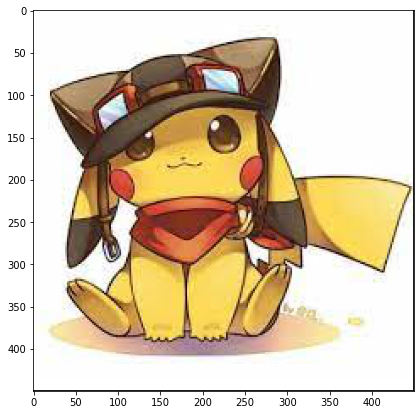

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(resize_img_bil)
plt.show()

In [ ]:
img_save = Image.fromarray(resize_img_nn.astype('uint8')).convert('RGB')
img_save.save('img_resize_nn.jpg')

In [ ]:
img_save = Image.fromarray(resize_img_bil.astype('uint8')).convert('RGB')
img_save.save('img_resize_bilinear.jpg')

# Задание 2 Сжатие изображения



In [ ]:
def downsample_1(img, size_factor):

  if size_factor <= 1:
    print('Не коректно введен size_factor')
    return np.copy(img)

  new_height = int(img.shape[0] / size_factor)
  new_width = int(img.shape[1] / size_factor)
  new_img = np.zeros((new_height, new_width, img.shape[2]), dtype=np.uint8)
  for i in range(new_height):
    for j in range(new_width):
      new_img[i, j] = img[int((size_factor - 1) / 2) + size_factor * i][int((size_factor - 1) / 2) + size_factor * j]
  return new_img

In [ ]:
downsample_1_img = downsample_1(img, 2)

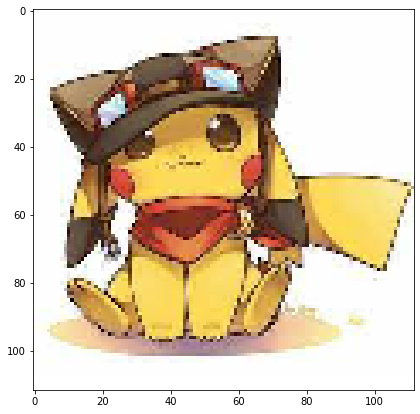

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(downsample_1_img)
plt.show()

In [ ]:
def downsample_2(img, size_factor):

  if size_factor <= 1:
    print('Не коректно введен size_factor')
    return np.copy(img)

  new_height = int(img.shape[0] / size_factor)
  new_width = int(img.shape[1] / size_factor)
  new_img = np.zeros((new_height, new_width, img.shape[2]), dtype=np.uint8)

  for i in range(new_height):
    for j in range(new_width):
      new_pixel = []
      for channel in range(img.shape[2]):
        new_channel = int(np.round(np.sum(img[i * size_factor:(i + 1)*size_factor,j * size_factor:(j + 1)*size_factor, channel]) / (size_factor ** 2)))
        new_pixel.append(new_channel)
      new_img[i, j] = new_pixel
  return new_img

In [ ]:
downsample_2_img = downsample_2(img, 2)

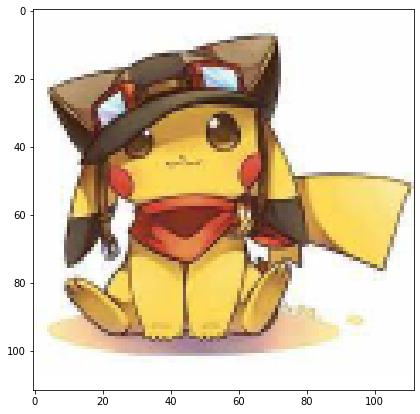

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(downsample_2_img)
plt.show()

In [ ]:
img_save = Image.fromarray(downsample_2_img.astype('uint8')).convert('RGB')
img_save.save('downsample_2_img.jpg')

In [ ]:
img_save = Image.fromarray(downsample_1_img.astype('uint8')).convert('RGB')
img_save.save('downsample_1_img.jpg')

# Задание 3 Изменение яркости

In [ ]:
def linear_hist_transform(img, percent=0.05):

  hist, bins = np.histogram(img.flatten(), bins = 256, range=[0, 256])
  cdf = hist.cumsum()
  cdf_normalize = cdf / cdf.max()
  cutoff_low = np.searchsorted(cdf_normalize, percent)
  cutoff_high = np.searchsorted(cdf_normalize, 1 - percent)
  img_linear_hist_transform = np.interp(x = img, xp = bins[cutoff_low:cutoff_high], fp = np.linspace(0, 255, num = cutoff_high - cutoff_low))
  img_linear_hist_transform = img_linear_hist_transform.astype(np.uint8)

  return img_linear_hist_transform

In [ ]:
import copy

In [ ]:
img_gray = copy.deepcopy(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

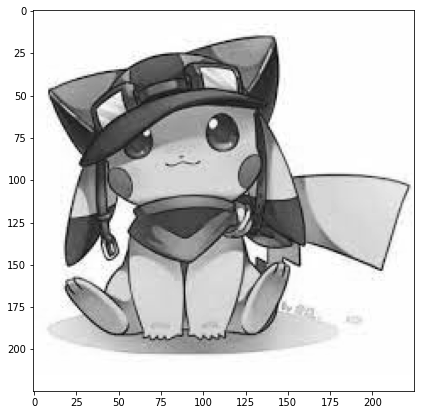

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_gray, cmap='gray')
plt.show()

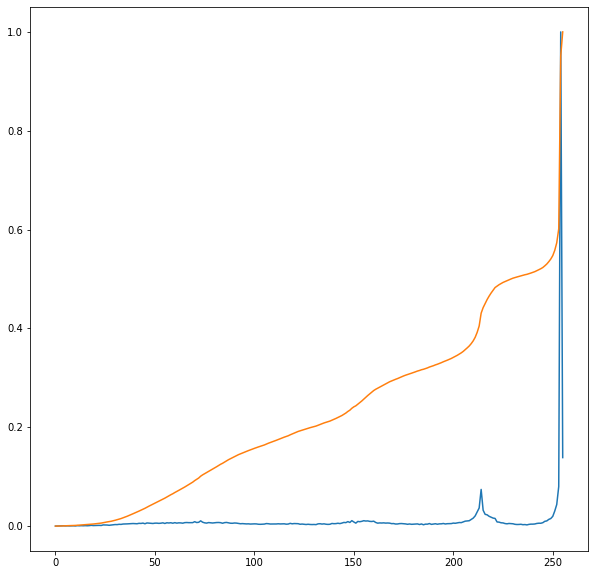

In [ ]:
fig = plt.figure(figsize = (10, 10))
hist, _ = np.histogram(img_gray.flatten(), bins = 256, range = [0, 256])
plt.plot(list(range(256)), hist / max(hist))
cdf = hist.cumsum()
plt.plot(list(range(256)), cdf / cdf[-1])
plt.show()

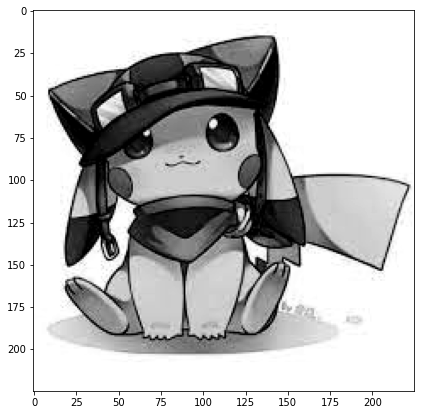

In [ ]:
img_linear_hist_transform = linear_hist_transform(img_gray, 0.05)
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_linear_hist_transform, cmap='gray')
plt.show()

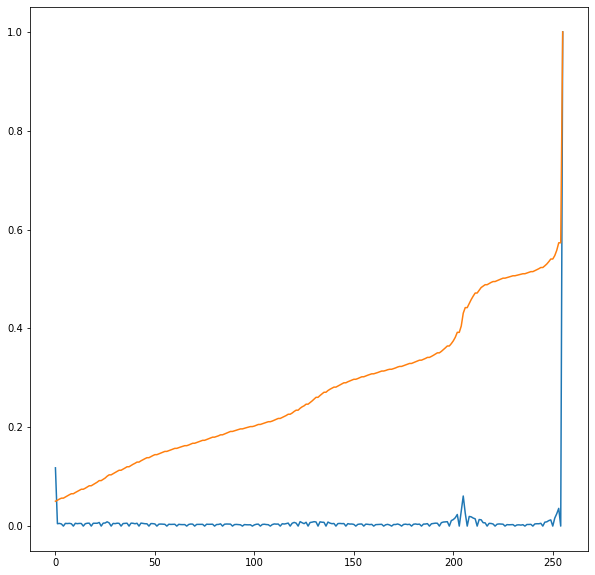

In [ ]:
fig = plt.figure(figsize = (10, 10))
hist, _ = np.histogram(img_linear_hist_transform.flatten(), bins = 256, range = [0, 256])
plt.plot(list(range(256)), hist / max(hist))
cdf = hist.cumsum()
plt.plot(list(range(256)), cdf / cdf[-1])
plt.show()

# Задание 4 Гамма коррекция

In [ ]:
def gamma_transform(img, gamma):
  norm_img = img.astype(np.float32) / 255.0
  gamma_img = np.power(norm_img, gamma)
  transform_gamma_img = (gamma_img * 255.0).astype(np.uint8)
  return transform_gamma_img

In [ ]:
img_gamma_1 = gamma_transform(img_gray, 1/2)

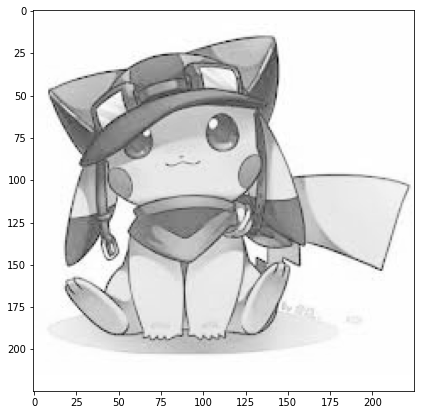

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_gamma_1, cmap='gray')
plt.show()

In [ ]:
img_gamma_2 = gamma_transform(img_gray, 2)

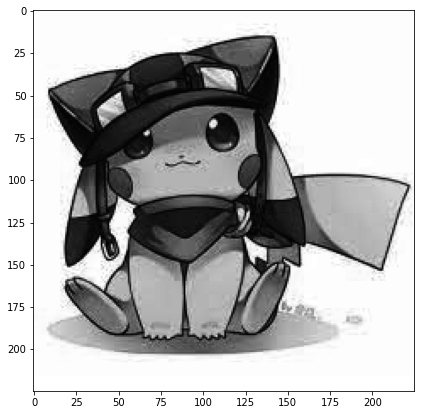

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_gamma_2, cmap='gray')
plt.show()

# Задание 5 Эквализация гистограммы

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Unequalized_Hawkes_Bay_NZ.jpg/300px-Unequalized_Hawkes_Bay_NZ.jpg"
urllib.request.urlretrieve(url, "image_heq.jpg")
img_heq = np.array(Image.open("image_heq.jpg"))

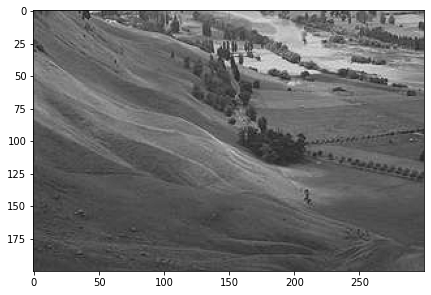

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_heq, cmap='gray')
plt.show()

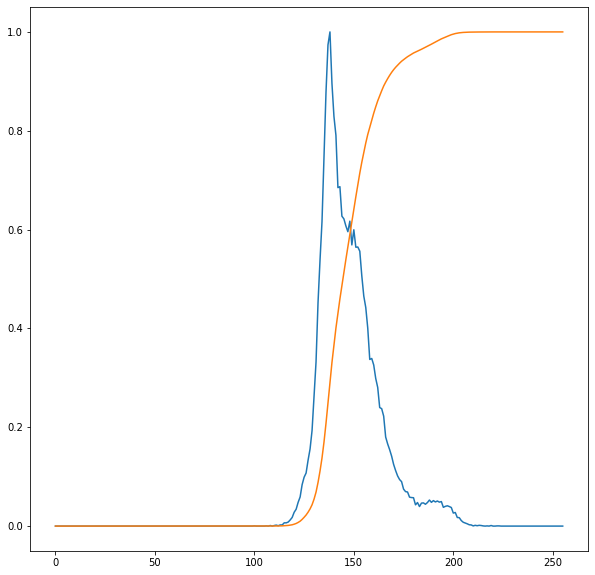

In [ ]:
fig = plt.figure(figsize = (10, 10))
hist, _ = np.histogram(img_heq.flatten(), bins = 256, range = [0, 256])
plt.plot(list(range(256)), hist / max(hist))
cdf = hist.cumsum()
plt.plot(list(range(256)), cdf / cdf[-1])
plt.show()

In [ ]:
def hist_eq(img):
  hist, bins = np.histogram(img.flatten(), 256, [0, 256])
  cdf = hist.cumsum()
  cdf_normalize = (cdf * 255 / cdf[-1])
  img_hist_eq = cdf_normalize[img]
  return img_hist_eq

In [ ]:
img_hist_eq = hist_eq(img_heq)

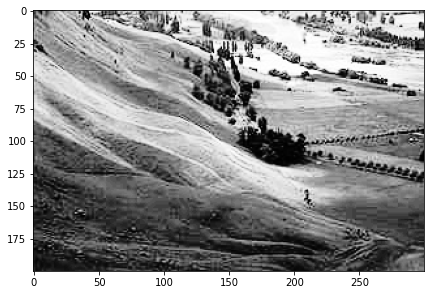

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_hist_eq, cmap='gray')
plt.show()

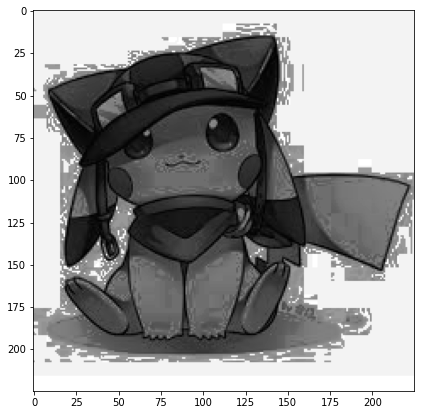

In [ ]:
img_hist_eq_pikachu = hist_eq(img_gray)
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_hist_eq_pikachu, cmap='gray')
plt.show()